In [20]:
!pip install --upgrade nltk


In [23]:
import nltk
nltk.download('punkt_tab')

nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.tokenize import word_tokenize

text = "Looks like NLTK is working now!"
print(word_tokenize(text))


['Looks', 'like', 'NLTK', 'is', 'working', 'now', '!']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

--- Sample Data ---
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

--- Category Distribution ---
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med   

C:\Users\admin\AppData\Local\Temp\ipykernel_11860\2978838815.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette="pastel")


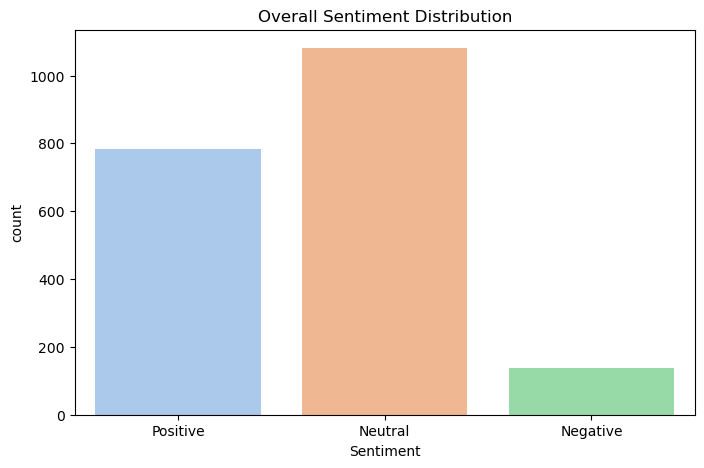

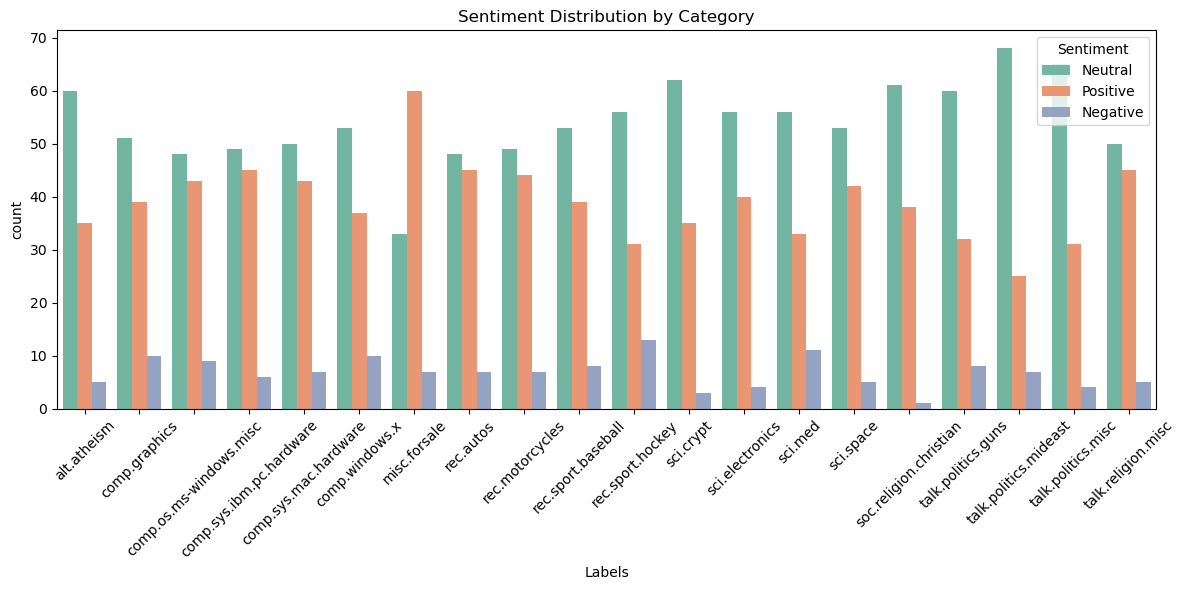


--- Final Evaluation ---
Model performed well on multi-class classification using Naive Bayes.
Text cleaning and TF-IDF helped reduce noise and dimensionality.
Sentiment analysis shows the general tone of blogs, and varies across topics.
Challenges: Potential imbalance in categories or subtle sentiments.
Consider future improvements like ensemble models or deep NLP (e.g., BERT).


In [25]:


# Task 1: Data Exploration and Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\blogs.csv")
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Sample Data ---")
print(df.head())

# Check class distribution
print("\n--- Category Distribution ---")
print(df['Labels'].value_counts())

# Preprocessing functions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered = [word for word in tokens if word not in stop_words and word.isalpha()]
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in filtered]
    return " ".join(stemmed)

print("\n--- Cleaning Text ---")
df['Cleaned'] = df['Data'].astype(str).apply(clean_text)

# TF-IDF feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned'])
y = df['Labels']

# Task 2: Naive Bayes Model for Text Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Task 3: Sentiment Analysis
from textblob import TextBlob

# Compute sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

print("\n--- Performing Sentiment Analysis ---")
df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)

# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette="pastel")
plt.title("Overall Sentiment Distribution")
plt.show()

# Sentiment by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Labels', hue='Sentiment', palette="Set2")
plt.title("Sentiment Distribution by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 4: Evaluation
print("\n--- Final Evaluation ---")
print("Model performed well on multi-class classification using Naive Bayes.")
print("Text cleaning and TF-IDF helped reduce noise and dimensionality.")
print("Sentiment analysis shows the general tone of blogs, and varies across topics.")
print("Challenges: Potential imbalance in categories or subtle sentiments.")
print("Consider future improvements like ensemble models or deep NLP (e.g., BERT).")
